# Deriving and Communicating Insights with Data Visualization
## Part 1: Exploratory Data Analysis of Prosper Loan Data
### Jong Min Lee

In [1]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid', {'grid.linestyle': 'dotted'})

## Exploratory Data Analysis
Clean version of the Prosper loan data was imported from the `prosperLoanData_clean.csv` file available in the local `data/` directory. Preliminary review of the data types of the columns in this dataset showed that the data types of the three columns, `Term`, `ListingCategory`, and `CreditScoreRange`, are no longer categorical variables. 

In [2]:
# load .csv file containing the clean version of Prosper loan data
df = pd.read_csv('data/prosperLoanData_clean.csv')

In [3]:
# summary of dataframe object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95381 entries, 0 to 95380
Data columns (total 15 columns):
ListingKey                    95381 non-null object
Term                          95381 non-null int64
BorrowerAPR                   95381 non-null float64
ListingCategory               95381 non-null int64
BorrowerState                 95381 non-null object
EmploymentStatus              95381 non-null object
EmploymentStatusDuration      95381 non-null int64
TotalCreditLinespast7years    95381 non-null int64
TotalInquiries                95381 non-null int64
DelinquenciesLast7Years       95381 non-null int64
BankcardUtilization           95381 non-null float64
DebtToIncomeRatio             95381 non-null float64
StatedMonthlyIncome           95381 non-null float64
LoanOriginalAmount            95381 non-null float64
CreditScoreRange              95381 non-null object
dtypes: float64(5), int64(6), object(4)
memory usage: 10.9+ MB


In [4]:
# first five rows of dataframe object
df.head()

,ListingKey,Term,BorrowerAPR,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,TotalCreditLinespast7years,TotalInquiries,DelinquenciesLast7Years,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,CreditScoreRange
0,1021339766868145413AB3B,36,0.16516,0,CO,Self-employed,2,12,3,4,0.00,0.17,3083.33,9425.0,640-659
1,10273602499503308B223C1,36,0.12016,2,CO,Employed,44,29,5,0,0.21,0.18,6125.00,10000.0,680-699
2,0EF5356002482715299901A,36,0.12528,16,GA,Employed,113,29,1,14,0.04,0.15,2875.00,10000.0,800-819
3,0F023589499656230C5E3E2,36,0.24614,2,MN,Employed,44,49,9,0,0.81,0.26,9583.33,15000.0,680-699
4,0F05359734824199381F61D,60,0.15425,1,NM,Employed,82,49,2,0,0.39,0.36,8333.33,15000.0,740-759


### 0. Data Wrangling
The data types of the three columns, `Term`, `ListingCategory`, and `CreditScoreRange`, were changed again to categorical variables by re-applying the appropriate cleaning operations from __Part 0: Data Wrangling__.

In [5]:
# ordered list of unique values in Term
terms = list(df.Term.unique())
terms.sort()

# convert data type of Term to (ordered) category
loan_terms = pd.api.types.CategoricalDtype(ordered = True, categories = terms)
df.Term = df.Term.astype(loan_terms)

# verify that data type of Term is (ordered) category
df.Term.dtype

CategoricalDtype(categories=[12, 36, 60], ordered=True)

In [6]:
# ordered list of unique values in ListingCategory
categories = list(df.ListingCategory.unique())
categories.sort()

# convert data type of ListingCategory to (nominal) category
listing_categories = pd.api.types.CategoricalDtype(categories = categories)
df.ListingCategory = df.ListingCategory.astype(listing_categories)

# verify that data type of ListingCategory is (nominal) category
df.ListingCategory.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  18, 19, 20],
                 ordered=False)

In [7]:
# ordered list of unique values in CreditScoreRange
ranges = list(df.CreditScoreRange.unique())
ranges.sort()

# convert data type of CreditScoreRange to (ordinal) category
creditscore_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = ranges)
df.CreditScoreRange = df.CreditScoreRange.astype(creditscore_ranges)

# verify that data type of CreditScoreRange is (ordinal) category
df.CreditScoreRange.dtype

CategoricalDtype(categories=['520-539', '540-559', '560-579', '580-599', '600-619',
                  '620-639', '640-659', '660-679', '680-699', '700-719',
                  '720-739', '740-759', '760-779', '780-799', '800-819',
                  '820-839', '840-859', '860-879', '880-899'],
                 ordered=True)

### 1. Univariate Exploration
#### 1.1 Borrower's APR

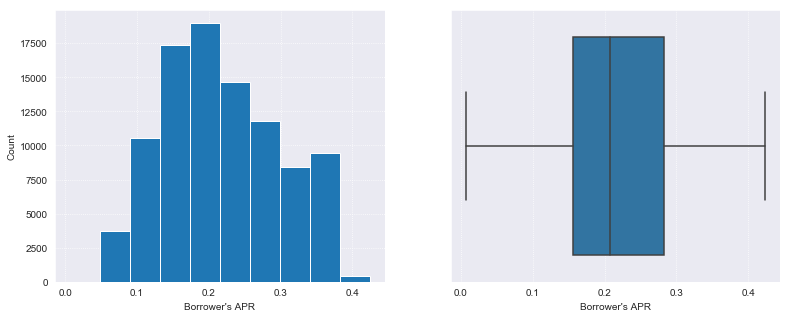

In [8]:
# distribution of borrowers' APRs for default bin size
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'BorrowerAPR'); # histogram of lengths
plt.xlabel('Borrower\'s APR')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'BorrowerAPR', fliersize = 4) # box plot of lengths
plt.xlabel('Borrower\'s APR');

#### 1.2 Categorical Variables

Two objects, `base_color` and `total_listings`, were pre-defined and applied to the univariate explorations for variables with data types of either object or category. `base_color` was used to apply the same color to all categories in a bar plot created with `seaborn`. `total_listings` was used in the calculation of the proportion of each category in a bar plot. 

In [9]:
base_color = sns.color_palette()[0] # base color to be applied to all bars in bar plots
total_listings = df.shape[0] # total number of listings

__1.2.1 Term__

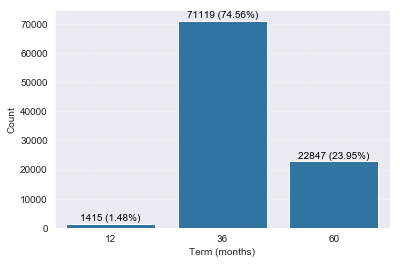

In [10]:
# profile of terms for Prosper loans

# bar plot of number of loans for each term
sns.countplot(data = df, x = 'Term', color = base_color)
plt.xlabel('Term (months)')
plt.ylabel('Count')

# retrieve locations and labels of xticks
locs, labels = plt.xticks()

# series that list number of loans for each term
term_counts = df.Term.value_counts()

for loc, label in zip(locs, labels):
    # number of loan for the given term
    term_count = term_counts[int(label.get_text())] # indices of term_counts series are integers, not strings
    
    # calculate the proportion of each term in % [format: term count (proportion)]
    term_proportion = '{} ({:0.2f}%)'.format(term_count, 100*term_count/total_listings)
    
    # annotate the proportion of the term at the top of its corresponding bar
    plt.text(x = loc, y = term_count + 1000, s = term_proportion, ha = 'center', color = 'black', fontsize = 10);

__1.2.2 Listing Category__

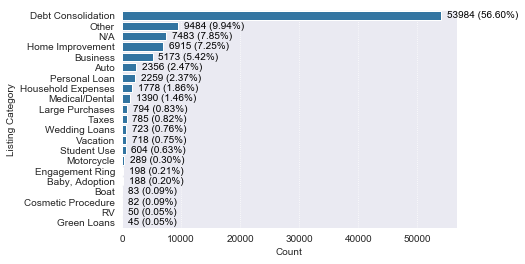

In [11]:
# profile of listing categories for Prosper loans

# horizontal bar plot of number of loans for each type of listing
category_codes = df.ListingCategory.value_counts().index
sns.countplot(data = df, y = 'ListingCategory', color = base_color
              , order = category_codes); # listing categories in descending order of number of loans
plt.xlabel('Count')
plt.ylabel('Listing Category')

# convert listing category codes to descriptions
locs = plt.yticks()[0]
label_dict = {0:'N/A', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use'
              , 6:'Auto', 7:'Other', 8:'Baby, Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring'
              , 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle'
              , 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'} # as defined in data_dictionary.xlsx
labels = [label_dict[category_code] for category_code in category_codes]
plt.yticks(locs, labels);

# series that list number of loans for each category
category_counts = df.ListingCategory.value_counts()

for loc, label in zip(locs, category_codes):
    # number of loan for the given category
    category_count = category_counts[label] # indices of term_counts series are integers, not strings
    
    # calculate the proportion of each category in % [format: category count (proportion)]
    category_proportion = '{} ({:0.2f}%)'.format(category_count, 100*category_count/total_listings)
    
    # annotate the proportion of the category to the right of its corresponding bar
    plt.text(y = loc, x = category_count + 1000, s = category_proportion, va = 'center', color = 'black', fontsize = 10);

__1.2.3 Borrower State__

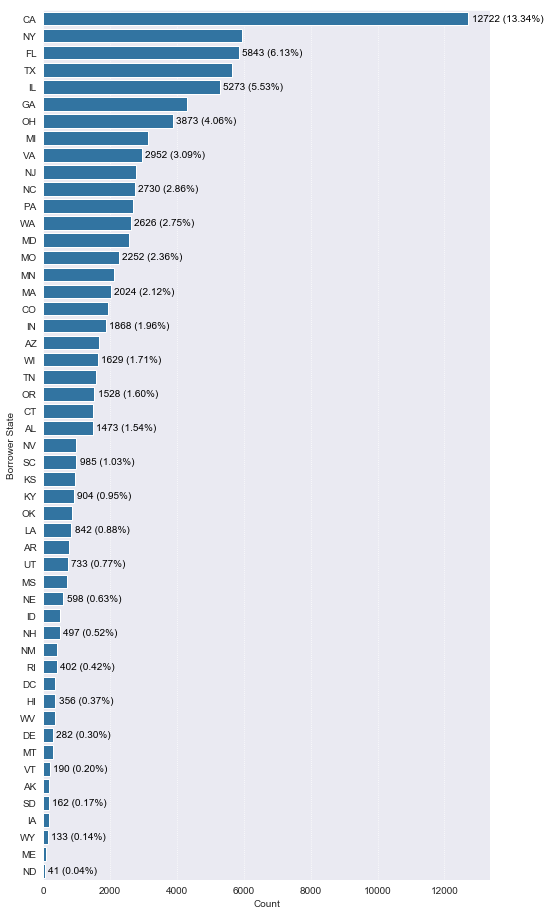

In [12]:
# states of borrowers' addresses

# horizontal bar plot of number of listings from each state
states = df.BorrowerState.value_counts().index
plt.figure(figsize = (8, 16))
sns.countplot(data = df, y = 'BorrowerState', color = base_color
              , order = states); # states in descending order of number of listings
plt.xlabel('Count')
plt.ylabel('Borrower State')

# retrieve locations of yticks
locs = plt.yticks()[0]

# number of listings in descending order for each state
state_counts = df.BorrowerState.value_counts()

# for every other states
for loc, state in zip(locs, states):
    if loc % 2 == 0:
        # number of listings for the given state
        state_count = state_counts[state]
        
        # calculate the proportion of each state in % [format: state count (proportion)]
        state_proportion = '{} ({:0.2f}%)'.format(state_count, 100*state_count/total_listings)
        
        # annotate the proportion of the state to the right of its corresponding bar
        plt.text(x = state_count + 100, y = loc, s = state_proportion, va = 'center', color = 'black', fontsize = 10)

__1.2.4 Status of Employment__

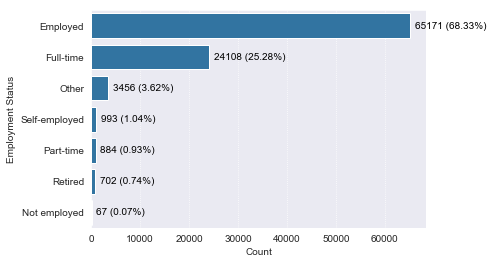

In [13]:
# profile of employment statuses of borrowers

# horizontal bar plot of number of listings for each employment status
employment_statuses = df.EmploymentStatus.value_counts().index
sns.countplot(data = df, y = 'EmploymentStatus', color = base_color
              , order = employment_statuses); # statuses in descending order of number of listings
plt.xlabel('Count')
plt.ylabel('Employment Status')

# retrieve locations of yticks
locs = plt.yticks()[0]

# number of listings in descending order for each status
status_counts = df.EmploymentStatus.value_counts()

for loc, status in zip(locs, employment_statuses):
    # number of listings for the given employment status
    status_count = status_counts[status]
    
    # calculate the proportion of the status in % [format: status count (proportion)]
    status_proportion = '{} ({:0.2f}%)'.format(status_count, 100*status_count/total_listings)
    
    # annotate the proportion of the state to the right of its corresponding bar
    plt.text(x = status_count + 1000, y = loc, s = status_proportion, va = 'center', color = 'black', fontsize = 10)

__1.2.5 Range of Borrower's Credit Score__

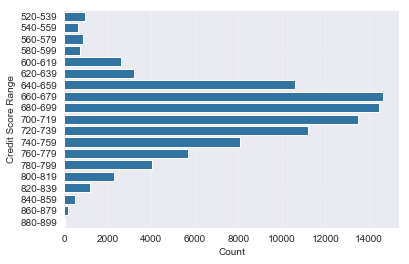

In [14]:
# profile of borrowers' credit score ranges

# horizontal bar plot of number of listings for each credit score range
# base_color = sns.color_palette()[0]
sns.countplot(data = df, y = 'CreditScoreRange', color = base_color)
plt.xlabel('Count')
plt.ylabel('Credit Score Range');

#### 1.3 Discrete Data
__1.3.1 Duration of Empoyment Status__

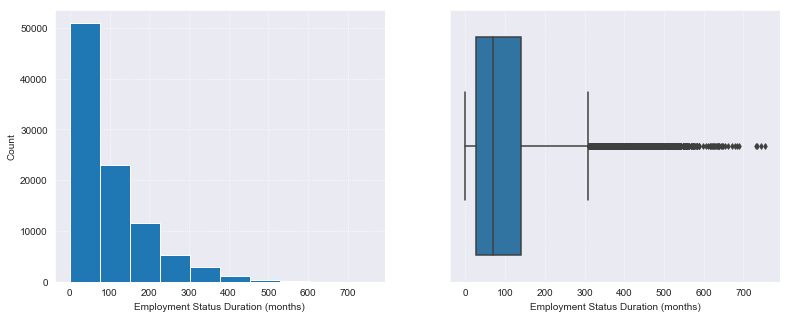

In [15]:
# distribution of lengths in months of employment statuses
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'EmploymentStatusDuration'); # histogram of lengths
plt.xlabel('Employment Status Duration (months)')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'EmploymentStatusDuration', fliersize = 4) # box plot of lengths
plt.xlabel('Employment Status Duration (months)');

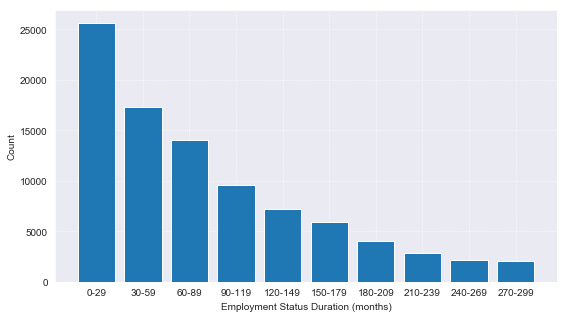

In [16]:
# employment status duration for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 300+30, 30) # 10 bins
plt.hist(data = df, x = 'EmploymentStatusDuration', bins = bins
         , rwidth = 0.8) # shrink width to indicate that the data is discrete

# specify and set locations and labels for xticks
locs = []
labels = []
for i in range(len(bins)):
    if i+1 < len(bins):
        locs.append(bins[i] + (bins[i+1]-bins[i])/2)
        labels.append(str(bins[i])+'-'+str(bins[i+1]-1))
plt.xticks(locs, labels)

plt.xlabel('Employment Status Duration (months)')
plt.ylabel('Count');

__1.3.2 Number of Total Credit Lines in Past 7 Years__

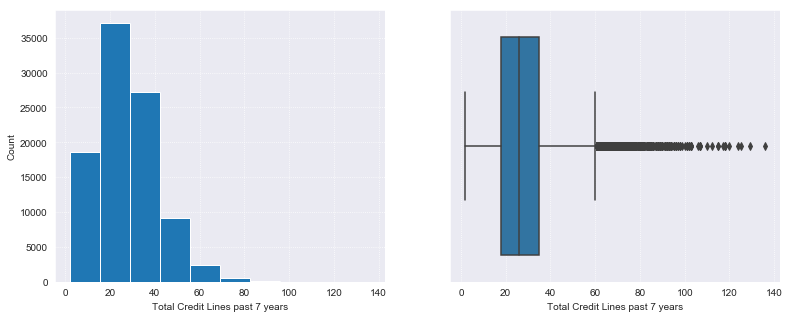

In [17]:
# distribution of credit lines
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # second of two subplots arranged in 1-by-2
plt.hist(x = df.TotalCreditLinespast7years) # histogram with default bin size
plt.xlabel('Total Credit Lines past 7 years')
plt.ylabel('Count');

plt.subplot(1,2,2) # first of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'TotalCreditLinespast7years') # box plot
plt.xlabel('Total Credit Lines past 7 years');

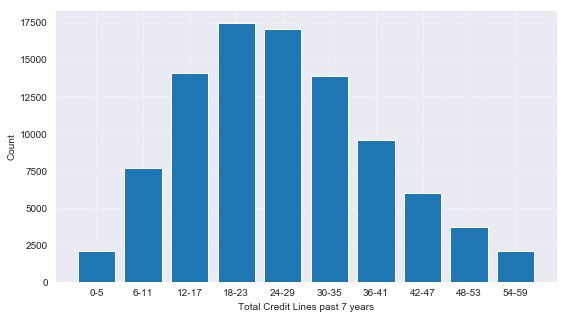

In [18]:
# credit lines for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 60+6, 6) # 10 bins
plt.hist(data = df, x = 'TotalCreditLinespast7years', bins = bins
         , rwidth = 0.8) # shrink width to indicate that the data is discrete

# specify and set locations and labels for xticks
locs = []
labels = []
for i in range(len(bins)):
    if i+1 < len(bins):
        locs.append(bins[i] + (bins[i+1]-bins[i])/2)
        labels.append(str(bins[i])+'-'+str(bins[i+1]-1))
plt.xticks(locs, labels)

plt.xlabel('Total Credit Lines past 7 years')
plt.ylabel('Count');

__1.3.3 Number of Total Inquiries__

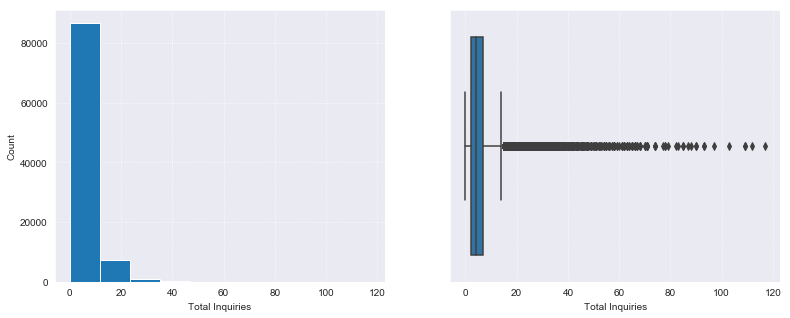

In [19]:
# distribution of total inquiries
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # second of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'TotalInquiries') # histogram with default bin size
plt.xlabel('Total Inquiries')
plt.ylabel('Count');

plt.subplot(1,2,2) # first of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'TotalInquiries') # box plot
plt.xlabel('Total Inquiries');

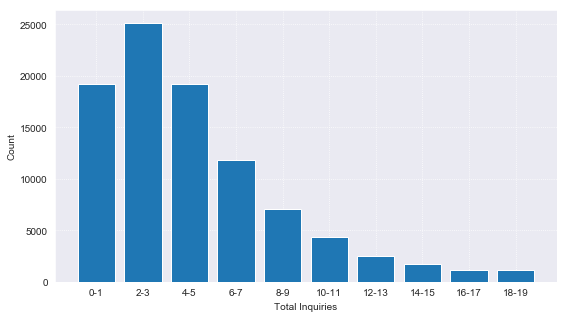

In [20]:
# total inquiries for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 20+2, 2) # 10 bins
plt.hist(data = df, x = 'TotalInquiries', bins = bins
         , rwidth = 0.8) # shrink width to indicate that the data is discrete

# specify and set locations and labels for xticks
locs = []
labels = []
for i in range(len(bins)):
    if i+1 < len(bins):
        locs.append(bins[i] + (bins[i+1]-bins[i])/2)
        labels.append(str(bins[i])+'-'+str(bins[i+1]-1))
plt.xticks(locs, labels)

plt.xlabel('Total Inquiries')
plt.ylabel('Count');

__1.3.4 Number of Delinquencies Last 7 Years__

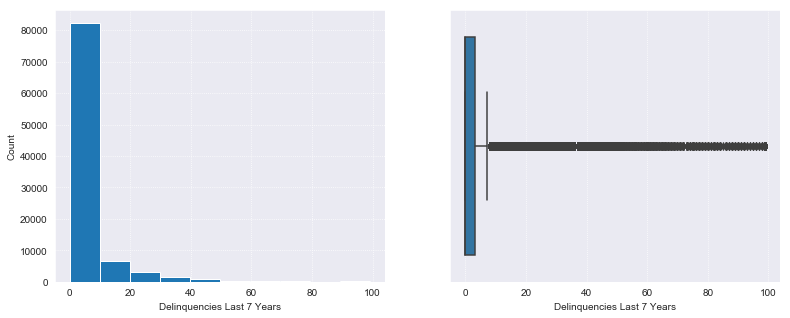

In [21]:
# distribution of number of delinquencies
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # second of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'DelinquenciesLast7Years') # histogram with default bin size
plt.xlabel('Delinquencies Last 7 Years')
plt.ylabel('Count');

plt.subplot(1,2,2) # first of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'DelinquenciesLast7Years') # box plot
plt.xlabel('Delinquencies Last 7 Years');

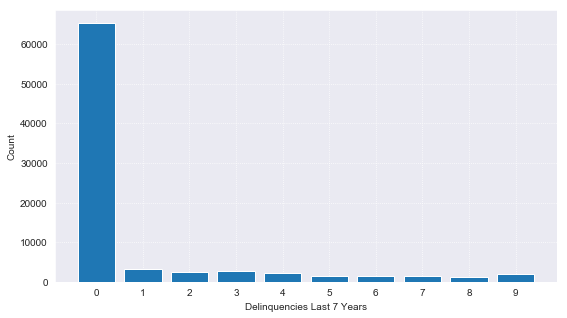

In [22]:
# number of delinquencies for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 10+1, 1) # 10 bins
plt.hist(data = df, x = 'DelinquenciesLast7Years', bins = bins
         , rwidth = 0.8) # shrink width to indicate that the data is discrete

# specify and set locations and labels for xticks
locs = []
labels = []
for i in range(len(bins)):
    if i+1 < len(bins):
        locs.append(bins[i] + (bins[i+1]-bins[i])/2)
        labels.append(bins[i])
plt.xticks(locs, labels)

plt.xlabel('Delinquencies Last 7 Years')
plt.ylabel('Count');

### 1.4 Continuous Data
__1.4.1 Bankcard Utilization Rate__

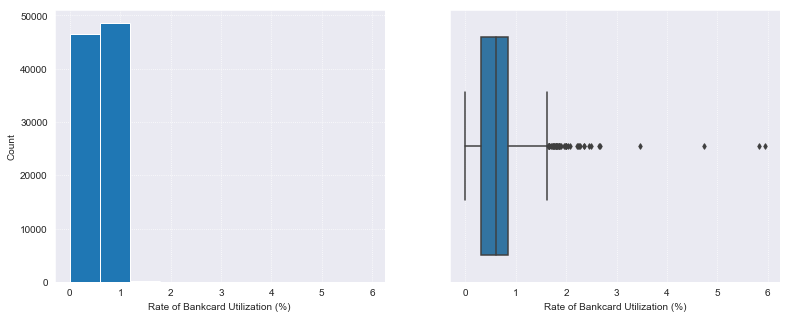

In [23]:
# distribution of bank card utilization rates
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'BankcardUtilization'); # histogram of rates
plt.xlabel('Rate of Bankcard Utilization (%)')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'BankcardUtilization', fliersize = 4) # box plot of rates
plt.xlabel('Rate of Bankcard Utilization (%)');

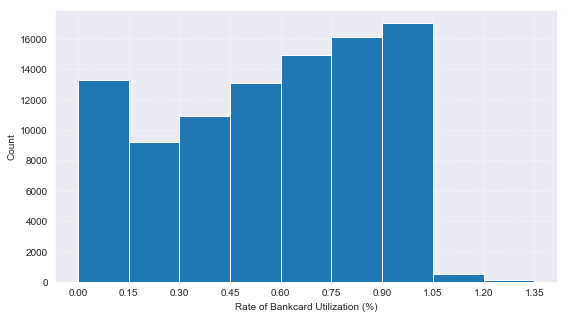

In [24]:
# bank card utilization rates for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 1.35+0.15, 0.15)
plt.hist(data = df, x = 'BankcardUtilization', bins = bins)

# specify and set locations and labels for xticks
locs = bins
labels = ['{:0.2f}'.format(bin_edge) for bin_edge in bins]
plt.xticks(locs, labels)

plt.xlabel('Rate of Bankcard Utilization (%)')
plt.ylabel('Count');

__1.4.2 Debt to Income Ratio__

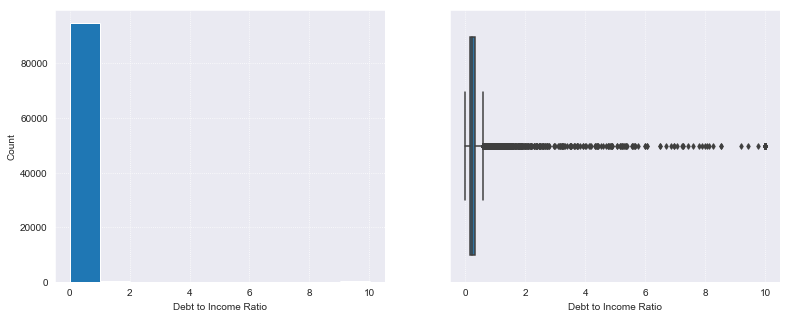

In [25]:
# distribution of debt to income ratios
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'DebtToIncomeRatio'); # histogram of ratios
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'DebtToIncomeRatio', fliersize = 4) # box plot of ratios
plt.xlabel('Debt to Income Ratio');

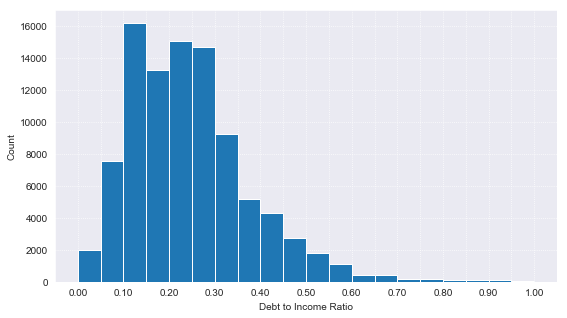

In [26]:
# debt to income ratios for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 1+0.05, 0.05)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)

# specify and set locations and labels for xticks
locs = bins
labels = []
for i, bin_edge in enumerate(bins):
    if i % 2 == 0: # for every two bin edges
        labels.append('{:0.2f}'.format(bin_edge))
    else:
        labels.append('')
plt.xticks(locs, labels)

plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count');

__1.4.3 Stated Monthly Income__

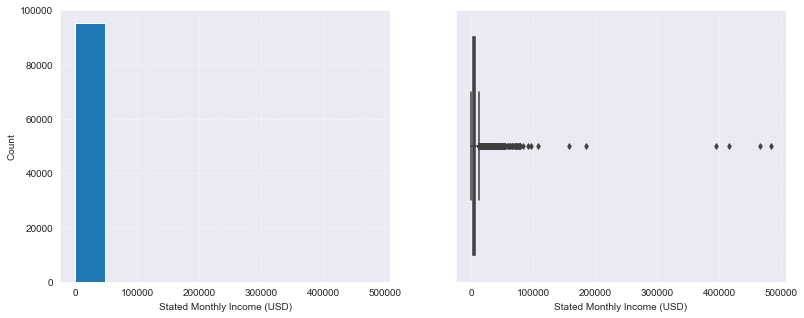

In [27]:
# distribution of monthly incomes
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'StatedMonthlyIncome'); # histogram of incomes
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'StatedMonthlyIncome', fliersize = 4) # box plot of incomes
plt.xlabel('Stated Monthly Income (USD)');

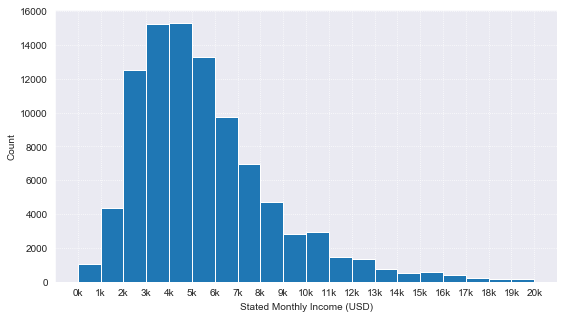

In [28]:
# monthly incomes for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 20000+1000, 1000)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)

# # specify and set locations and labels for xticks
locs = bins
labels = ['{:.0f}k'.format(bin_edge/1000) for bin_edge in bins]
plt.xticks(locs, labels)

plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count');

__1.4.4 Original Loan Amount__

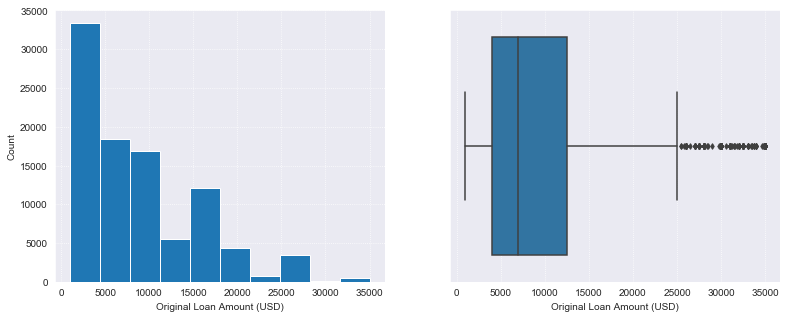

In [29]:
# distribution of loan amounts
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'LoanOriginalAmount'); # histogram of loan amounts
plt.xlabel('Original Loan Amount (USD)')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'LoanOriginalAmount', fliersize = 4) # box plot of loan amounts
plt.xlabel('Original Loan Amount (USD)');

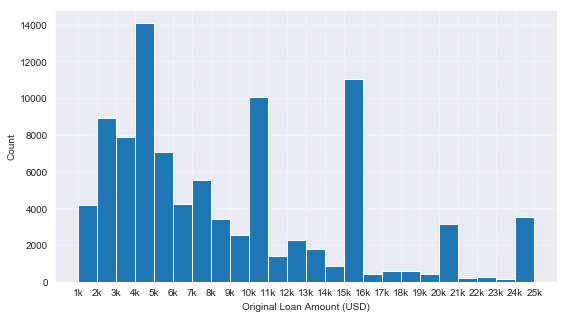

In [30]:
# loan amounts for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(df.LoanOriginalAmount.min(), 25000+1000, 1000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)

# specify and set locations and labels for xticks
locs = bins
labels = ['{:.0f}k'.format(bin_edge/1000) for bin_edge in bins]
plt.xticks(locs, labels)

plt.xlabel('Original Loan Amount (USD)')
plt.ylabel('Count');

### 2. Bivariate Exploration

### 3. Multivariate Exploration